<a href="https://colab.research.google.com/github/aravindrepository/Crypto-currency-price-prediction-model-and-analysis/blob/main/Crypto_price_prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### all required Modules

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from itertools import product




import warnings
from scipy import stats
import statsmodels.api as sm
warnings.filterwarnings('ignore')


import the data

In [4]:
data=pd.read_csv('data.csv')

In [5]:
data.head(4)

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0


###DATA info

In [6]:
data.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [7]:
data.tail(6)

,Timestamp,Open,High,Low,Close,Volume
6750275,1.737936e+09,102518.0,102559.0,102506.0,102558.0,0.771165
6750276,1.737936e+09,102628.0,102669.0,102608.0,102611.0,0.086742
6750277,1.737936e+09,102659.0,102712.0,102657.0,102712.0,0.488757
6750278,1.737936e+09,102631.0,102631.0,102573.0,102573.0,0.126719
6750279,1.737936e+09,102573.0,102604.0,102507.0,102514.0,0.474495
6750280,NaN,57854.0,57864.0,57835.0,57835.0,1.353466


In [15]:
df.shape

(1903, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750281 entries, 0 to 6750280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 309.0 MB


In [10]:
data.isnull().sum()

,0
Timestamp,1
Open,0
High,0
Low,0
Close,0
Volume,0


###Processing data

In [11]:
df=data
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.index = df.Timestamp
df = df.resample('D').mean()
df = df[df['Timestamp'] >= '2019-11-13']
df_month = df.resample('M').mean()
df_year = df.resample('A-DEC').mean()
df_Q = df.resample('Q-DEC').mean()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1903 entries, 2019-11-13 to 2025-01-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  1903 non-null   datetime64[ns]
 1   Open       1903 non-null   float64       
 2   High       1903 non-null   float64       
 3   Low        1903 non-null   float64       
 4   Close      1903 non-null   float64       
 5   Volume     1903 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 104.1 KB


In [13]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
Timestamp,,,,,,
2019-11-13,2019-11-13 11:59:30,8750.370576,8754.997667,8746.450500,8750.546451,2.438014
2019-11-14,2019-11-14 11:59:30,8677.499215,8682.022368,8672.876292,8677.389479,2.336288
2019-11-15,2019-11-15 11:59:30,8575.835056,8580.334660,8570.964465,8575.710125,3.545540
2019-11-16,2019-11-16 11:59:30,8469.530549,8472.837493,8466.167042,8469.173097,0.942587
2019-11-17,2019-11-17 11:59:30,8498.468549,8501.751799,8495.732424,8498.527896,1.182995


In [16]:
df.tail(1)

,Timestamp,Open,High,Low,Close,Volume
Timestamp,,,,,,
2025-01-27,2025-01-27,102573.0,102604.0,102507.0,102514.0,0.474495


In [14]:
df.shape

(1903, 6)

###ploting data by days,month,quater,year.

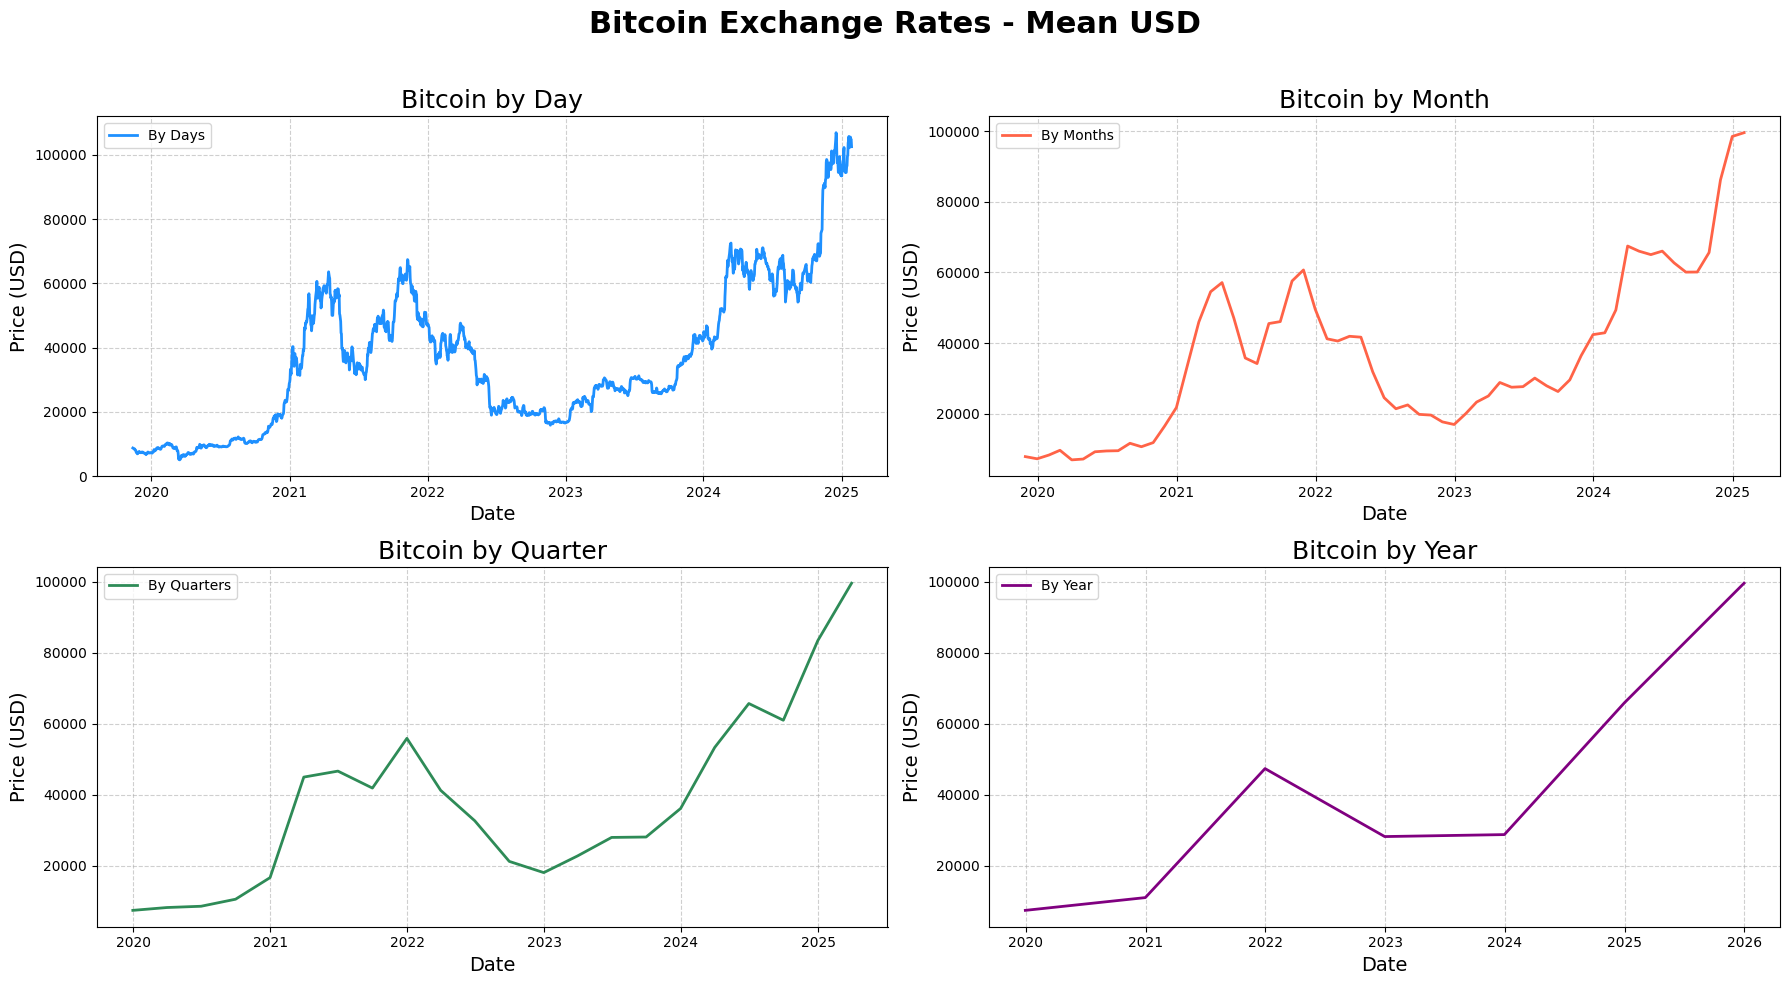

In [18]:
fig = plt.figure(figsize=[18, 10])
plt.suptitle('Bitcoin Exchange Rates - Mean USD', fontsize=22, fontweight='bold')


plt.subplot(221)
plt.plot(df['Close'], '-', label='By Days', color='dodgerblue', linewidth=2)
plt.title('Bitcoin by Day', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(222)
plt.plot(df_month['Close'], '-', label='By Months', color='tomato', linewidth=2)
plt.title('Bitcoin by Month', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(223)
plt.plot(df_Q['Close'], '-', label='By Quarters', color='seagreen', linewidth=2)
plt.title('Bitcoin by Quarter', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(224)
plt.plot(df_year['Close'], '-', label='By Year', color='purple', linewidth=2)
plt.title('Bitcoin by Year', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

eval test is: 0.9065768175298161
Not stationary


<Figure size 1700x600 with 0 Axes>

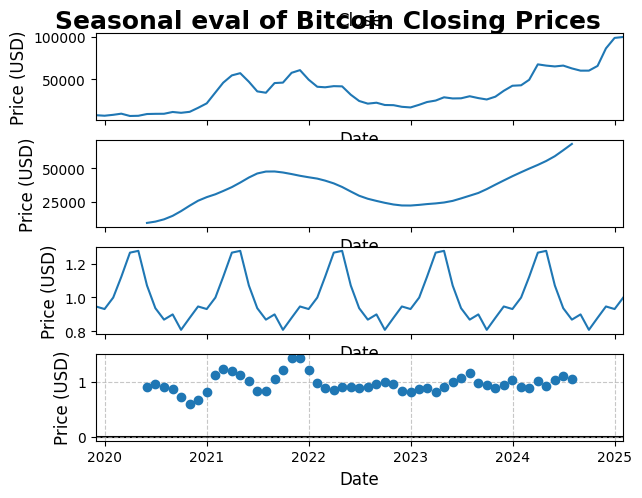

In [20]:
plt.figure(figsize=[17, 6])


result = sm.tsa.seasonal_decompose(df_month['Close'], model='multiplicative', period=12)


result.plot()
plt.suptitle('Seasonal eval of Bitcoin Closing Prices', fontsize=18, fontweight='bold')
plt.subplots_adjust(top=0.93)


for ax in plt.gcf().get_axes():
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price (USD)', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)


plt.grid(True, linestyle='--', alpha=0.7)
print(f'eval test is: {sm.tsa.stattools.adfuller(df_month.Close)[1]}')
print('Not stationary')

plt.show()

###tests

In [21]:
df_month['Close_box'], lmbda = stats.boxcox(df_month.Close)
print(f'clocebox test {sm.tsa.stattools.adfuller(df_month.Close_box)[1]}')
print('Not stationary')

clocebox test 0.5354700100768215
Not stationary


In [22]:
df_month['Close_box_diff'] = df_month.Close_box - df_month.Close_box.shift(12)
print("The seasonal test is: %f" % sm.tsa.stattools.adfuller(df_month.Close_box_diff[12:])[1])

The seasonal test is: 0.006982


###data transformation

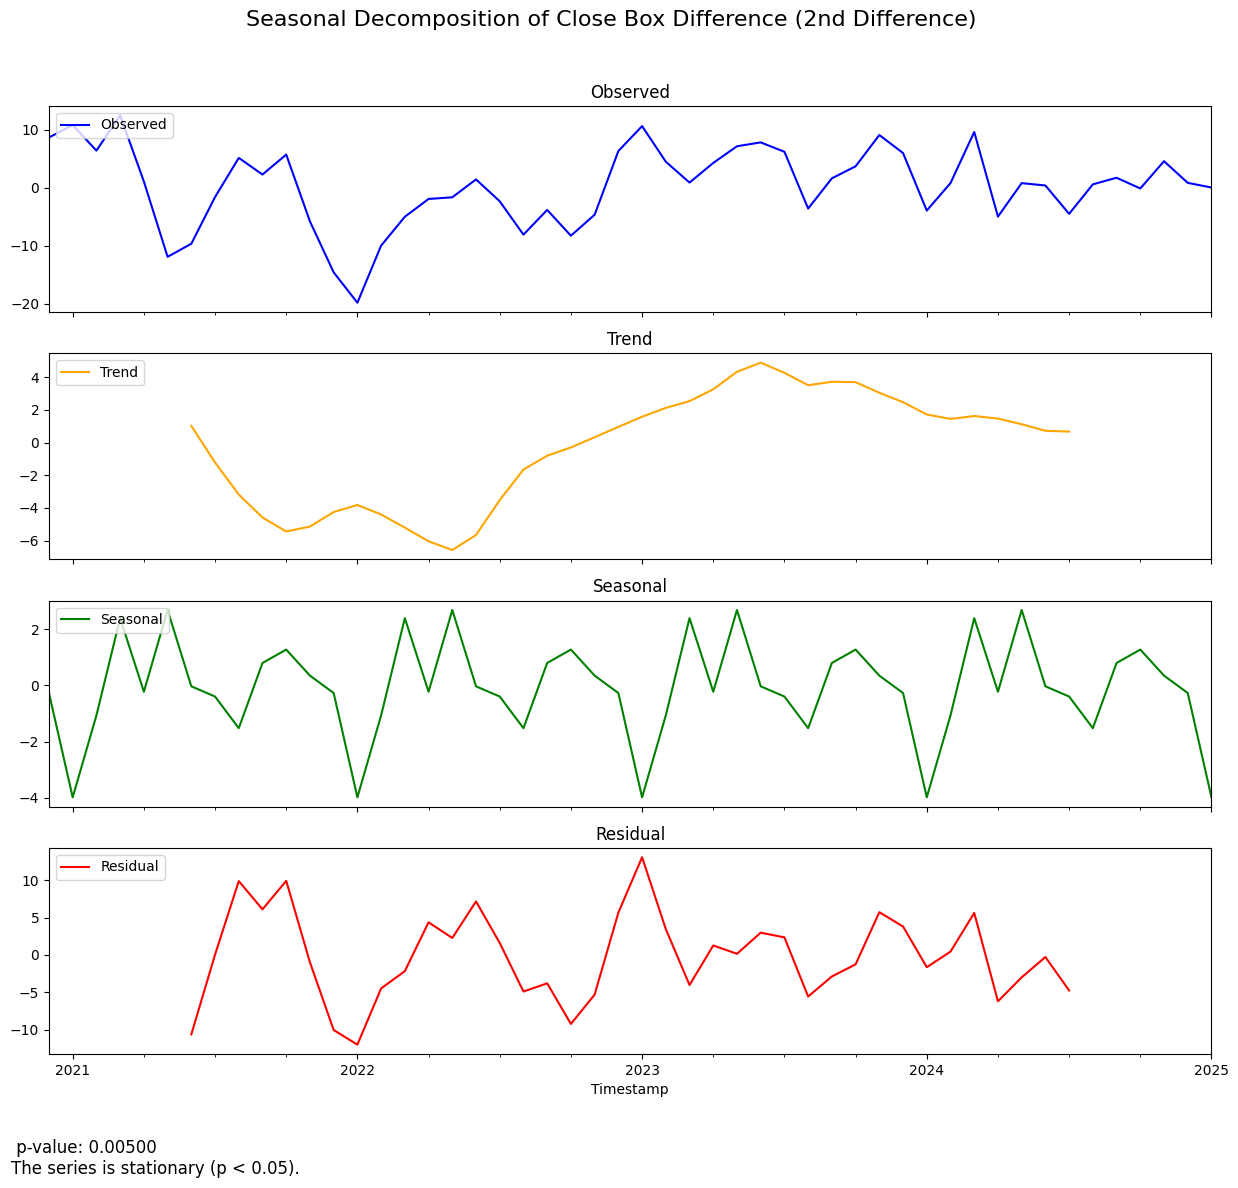

In [23]:
df_month['Close_box_diff2'] = df_month.Close_box_diff - df_month.Close_box_diff.shift(1)


adf_result = sm.tsa.stattools.adfuller(df_month.Close_box_diff2[13:])
p_value = adf_result[1]


if p_value < 0.05:
    stationarity_message = "The series is stationary (p < 0.05)."
else:
    stationarity_message = "The series is not stationary (p >= 0.05)."


result = sm.tsa.seasonal_decompose(df_month.Close_box_diff2[13:], model='additive', period=12)


fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)


result.observed.plot(ax=axes[0], color='blue', label='Observed')
axes[0].set_title('Observed')
axes[0].legend(loc='upper left')

result.trend.plot(ax=axes[1], color='orange', label='Trend')
axes[1].set_title('Trend')
axes[1].legend(loc='upper left')

result.seasonal.plot(ax=axes[2], color='green', label='Seasonal')
axes[2].set_title('Seasonal')
axes[2].legend(loc='upper left')

result.resid.plot(ax=axes[3], color='red', label='Residual')
axes[3].set_title('Residual')
axes[3].legend(loc='upper left')


plt.suptitle('Seasonal Decomposition of Close Box Difference (2nd Difference)', fontsize=16)


plt.subplots_adjust(top=0.9)  # Adjust the title to not overlap with plots

# Display Dickey-Fuller test result at the bottom of the figure
plt.figtext(0.1, 0.01, f' p-value: {p_value:.5f}\n{stationarity_message}', fontsize=12)


plt.show()


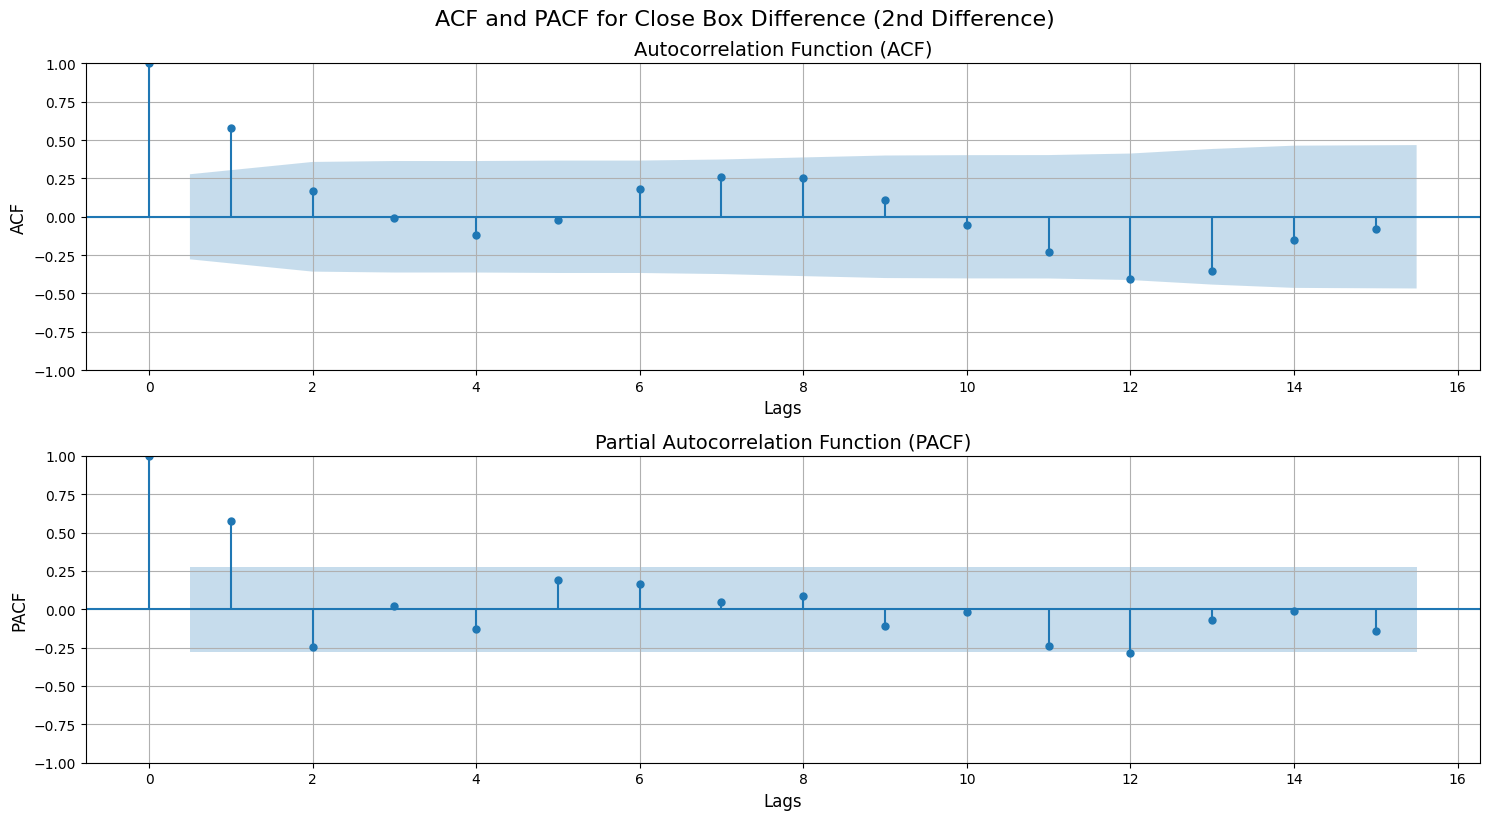

In [25]:
plt.figure(figsize=(15, 8))


ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.Close_box_diff2[13:].values.squeeze(), lags=15, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)', fontsize=14)
ax1.set_xlabel('Lags', fontsize=12)
ax1.set_ylabel('ACF', fontsize=12)
ax1.grid(True)


ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.Close_box_diff2[13:].values.squeeze(), lags=15, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
ax2.set_xlabel('Lags', fontsize=12)
ax2.set_ylabel('PACF', fontsize=12)
ax2.grid(True)


plt.tight_layout()


plt.suptitle('ACF and PACF for Close Box Difference (2nd Difference)', fontsize=16, y=1.02)
plt.show()

In [26]:
import warnings
import statsmodels.api as sm
from itertools import product

# Set up parameter ranges for the SARIMAX grid search
Qs = range(0, 2)  # Seasonal AR order
qs = range(0, 3)  # Non-seasonal AR order
Ps = range(0, 3)  # Seasonal MA order
ps = range(0, 3)  # Non-seasonal MA order

# Seasonal difference (D) and non-seasonal difference (d) values
D = 1
d = 1


parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)


best_aic = float("inf")
best_model = None
best_param = None
results = []


warnings.filterwarnings('ignore')


for param in parameters_list:
    try:

        model = sm.tsa.statespace.SARIMAX(df_month.Close_box,
                                          order=(param[0], d, param[1]),
                                          seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)


        aic = model.aic


        if aic < best_aic:
            best_aic = aic
            best_model = model
            best_param = param


        results.append([param, aic])

    except ValueError as e:

        print(f"Error with parameters {param}: {e}")
        continue


print(f"Best AIC: {best_aic} with parameters: {best_param}")

Best AIC: 307.79665989749014 with parameters: (0, 1, 0, 1)


df test:: p=0.000000


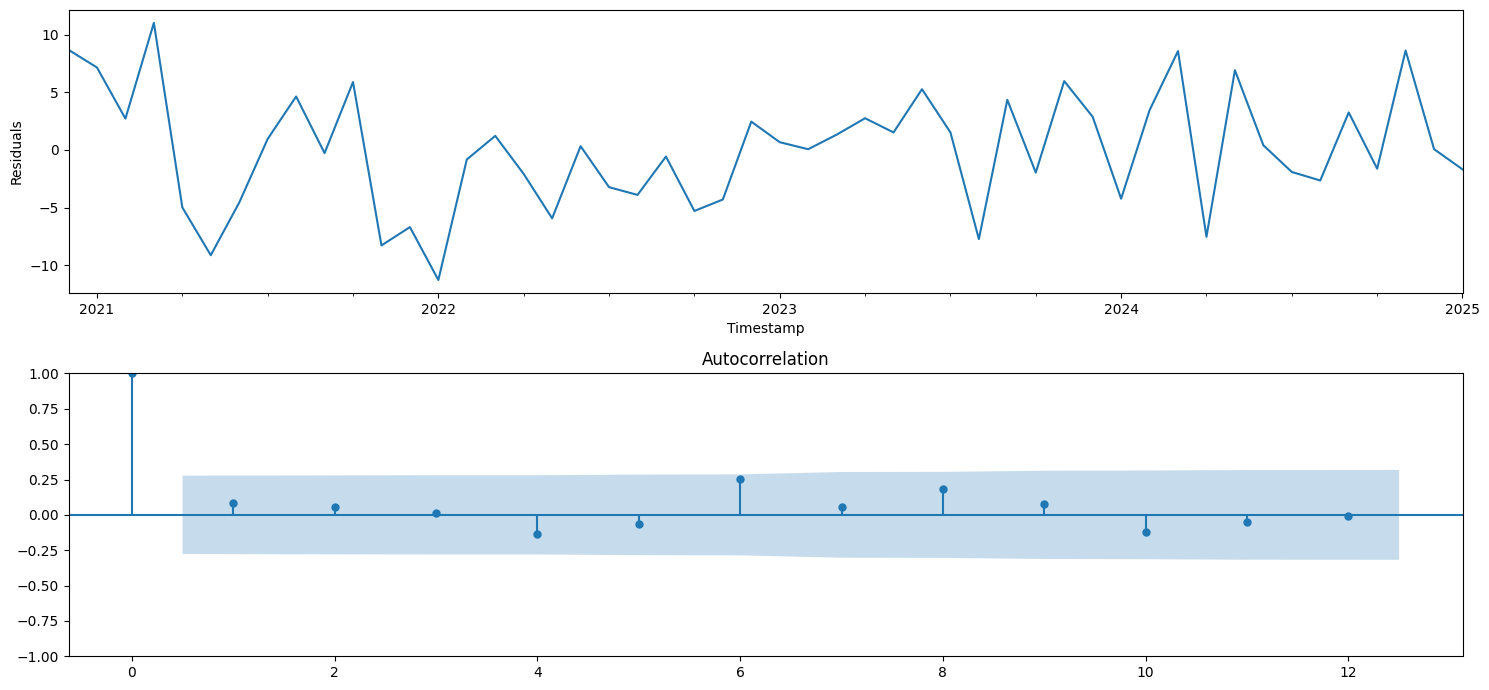

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("df test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [28]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

###final prediction

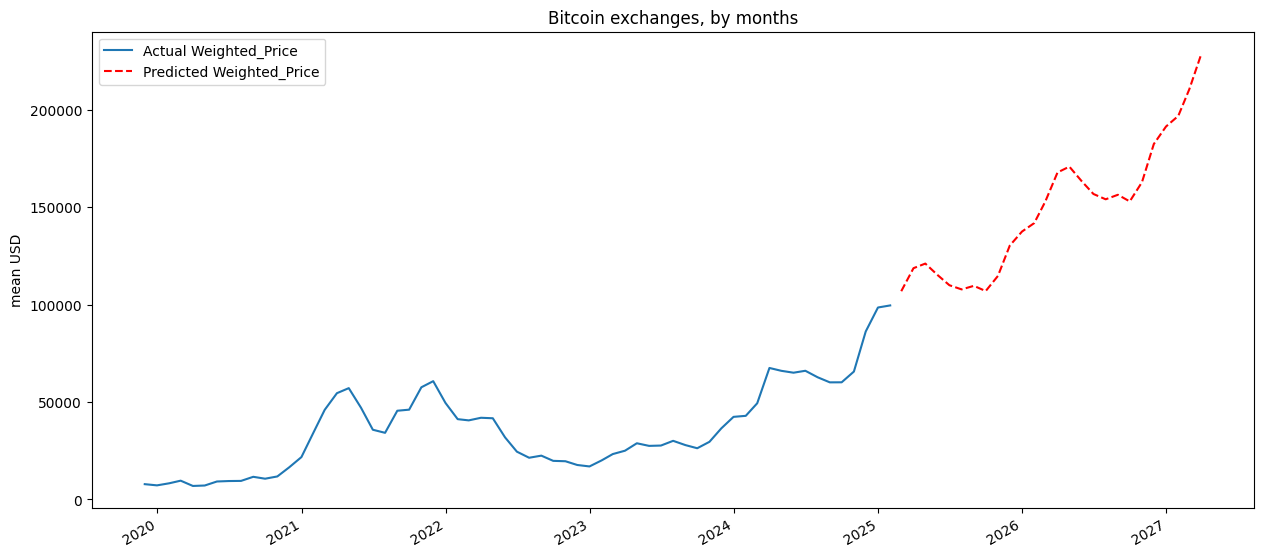

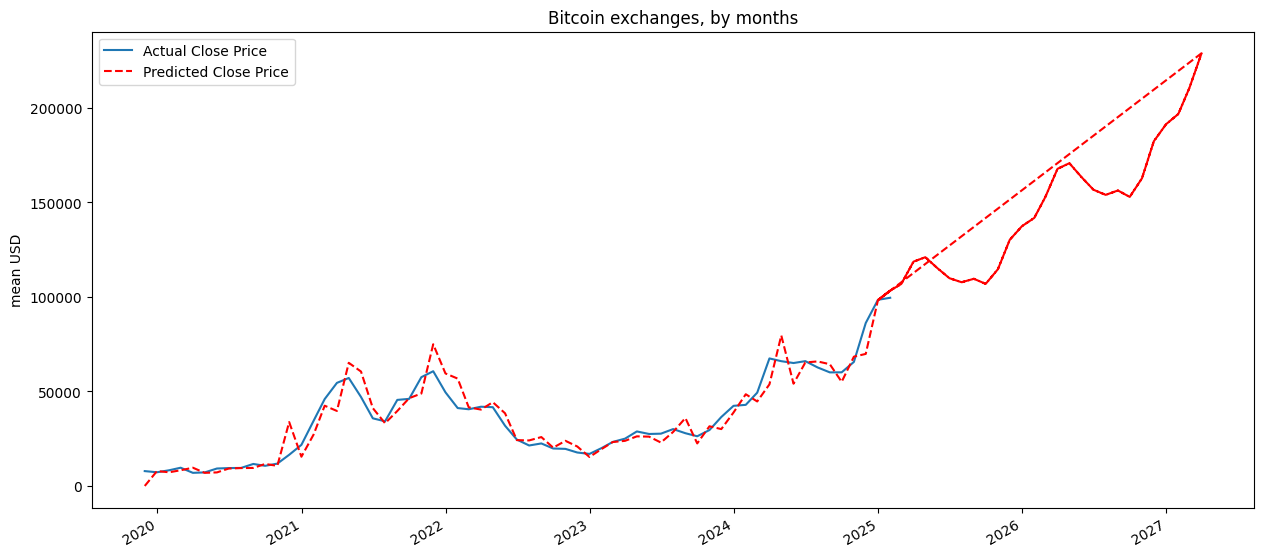

In [30]:
df_month2 = df_month[['Close']]


start_date = datetime(2024, 12, 30)
end_date = datetime(2027, 3, 31)


date_list = pd.date_range(start=start_date, end=end_date, freq='M')


future = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month2 = pd.concat([df_month2, future])


df_month2['forecast'] = invboxcox(best_model.predict(start=len(df_month2)-len(future), end=len(df_month2)-1), lmbda)


plt.figure(figsize=(15,7))
df_month2['Close'].plot(label='Actual Weighted_Price')
df_month2['forecast'].plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()


future = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month2 = pd.concat([df_month2, future])


df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=len(df_month2)-1), lmbda)


plt.figure(figsize=(15,7))
df_month2['Close'].plot(label='Actual Close Price')
df_month2['forecast'].plot(color='r', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()